In [ ]:
# The cells have to be run in order to compile.
#
# Some cells have multiple answers in the heading of the code.
#
# Thank you.
#

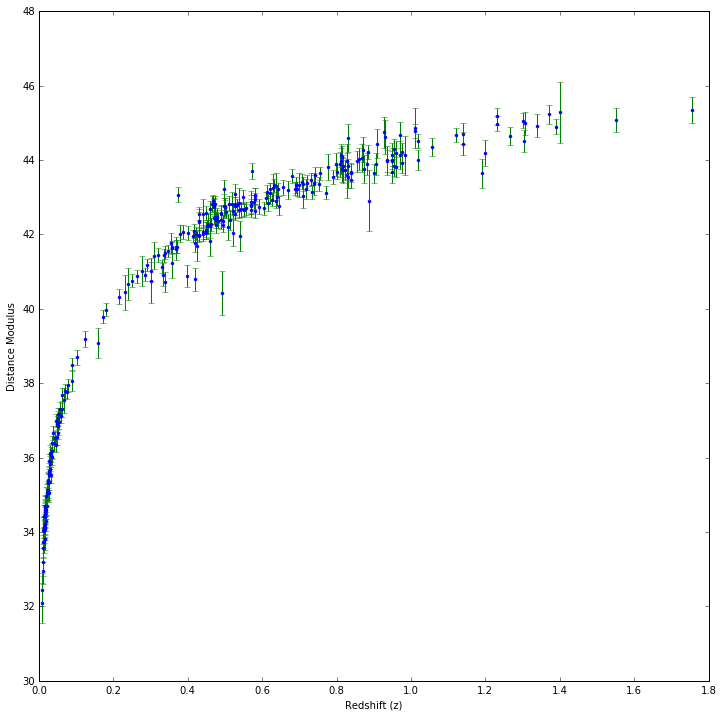

In [30]:
###################                     Problem 2                ##########################
#
#  Part a) Plotting Data
#
#






import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

mu=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(2))

z=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(1))

plt.figure(figsize=(12, 12))

sigma=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(3))

plt.errorbar(z, mu, yerr=sigma, fmt='.', ecolor='g')

plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus')



C:\Users\Joel\Anaconda2\lib\site-packages\ipykernel\__main__.py:88: RuntimeWarning: divide by zero encountered in log10


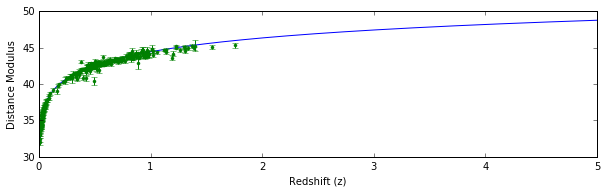

In [31]:
#####################                       Problem 2                  #########################
#
#  Part b) 
# 
#         i) Overplotting with Omega_m= 0.23
#
#






import scipy

from scipy.optimize import fmin

import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint

from astropy import constants as constants

from astropy import units as units

%matplotlib inline

h=0.63

h1=1.0

c=3.0E8/1000.0

H0=100.0*h1

Omega_m=.23

Omega_y=1-Omega_m

D_H=c/H0




def E(z1):
    
    
    
    Ez=np.sqrt(((Omega_m)*((1+z1)**3))+Omega_y)

    return Ez

    
def Dc(z1):
    
    
    
    dDc_dz= D_H*1/(E(z1))
    
    return dDc_dz


def main(y, z1): 
     
       
    derivs=[Dc(z1)]


    return derivs
                       
                                   
                                   
y0=[0]
                                   
                                   
                                   
#redshift array for solution

z1 = np.linspace(0, 5, 1000)
                                   
#solution                                   
soln = odeint(main, y0, z1)

Dl=soln[:,0]*(1+z1)

mu1= 25 - (5*np.log10(h)) + 5*np.log10(Dl)

fig = plt.figure(1, figsize=(10,12))


ax2 = fig.add_subplot(412)
ax2.plot(z1, mu1)
ax2.set_xlabel('Redshift (z)')
ax2.set_ylabel('Distance Modulus')




mu=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(2))

z=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(1))



sigma=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(3))

plt.errorbar(z, mu, yerr=sigma, fmt='.', ecolor='g')

plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus')



C:\Users\Joel\Anaconda2\lib\site-packages\ipykernel\__main__.py:88: RuntimeWarning: divide by zero encountered in log10


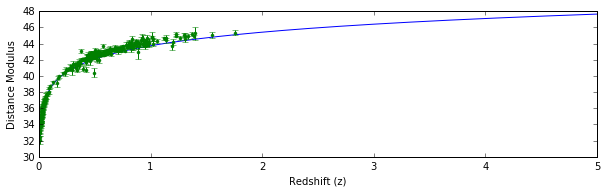

In [32]:
###################            Problem 2                     ##############################################
#
# Part b) 
#
#        ii) Overplotting with Omega_m= 1
#
#






import scipy

from scipy.optimize import fmin

import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint

from astropy import constants as constants

from astropy import units as units

%matplotlib inline

h=0.63

h1=1.0

c=3.0E8/1000.0

H0=100.0*h1

Omega_m=1

Omega_y=1-Omega_m

D_H=c/H0




def E(z1):
    
    
    
    Ez=np.sqrt(((Omega_m)*((1+z1)**3))+Omega_y)

    return Ez

    
def Dc(z1):
    
    
    
    dDc_dz= D_H*1/(E(z1))
    
    return dDc_dz


def main(y, z1): 
     
       
    derivs=[Dc(z1)]


    return derivs
                       
                                   
                                   
y0=[0]
                                   
                                   
                                   
#redshift array for solution

z1 = np.linspace(0, 5, 1000)
                                   
#solution                                   
soln = odeint(main, y0, z1)

Dl=soln[:,0]*(1+z1)

mu1= 25 - (5*np.log10(h)) + 5*np.log10(Dl)

fig = plt.figure(1, figsize=(10,12))


ax2 = fig.add_subplot(412)
ax2.plot(z1, mu1)
ax2.set_xlabel('Redshift (z)')
ax2.set_ylabel('Distance Modulus')




mu=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(2))

z=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(1))



sigma=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(3))

plt.errorbar(z, mu, yerr=sigma, fmt='.', ecolor='g')

plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus')


In [ ]:
###################             Problem 3                ##############################
#
#  Part a) How would you proceed to get bes fit Model?
#
#          I would minimize the chi^2 function and find the values of omega and h that minimized the function.
#
#


In [33]:
###################             Problem 3                ##############################
#
#  Part b) Finding values of Omega and h with fmin.
#
#






import scipy

from scipy.optimize import fmin

import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint

from astropy import constants as constants

from astropy import units as units

from scipy.integrate import quad

%matplotlib inline


c=3.0E8/1000.0

def Ezfunc(z1, omega_m):
    h1=1
    
    H0=100.0*h1

    D_H=c/H0  

    omega_y=1-omega_m

    Ez=np.sqrt(((omega_m)*((1+z1)**(3.0)))+omega_y)
    
    return Ez

def main( z1, omega_m):
    
    
    dDc_dz= D_H/(Ezfunc(z1, omega_m))
    
    return dDc_dz



def mu_th(z1, omega_m, h):

  
    soln = quad(main, 0.0, z1, args=(omega_m))
    
    Dl= (soln[0]*(1.0+z1))
    
    u= 25 - (5*np.log10(h)) + (5*np.log10(Dl))

    return u



z_array=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(1))

mu_array=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(2))

sigma_array=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(3))



def chi_2(parameters, z_array, sigma_array, mu_array):
    
    omega_m, h= parameters
    
    chi2 = 0
    
    mumodel = 0
    
    for i in range(len(z_array)):
        
        mumodel=mu_th(z_array[i], omega_m, h)
        
        chi2+=(((mu_array[i]) - (mumodel))**2)/((sigma_array[i])**2)
    
    
    return chi2

para = ([.23,.7])


fmin(chi_2, para, args=(z_array, sigma_array, mu_array))



Optimization terminated successfully.
         Current function value: 393.490323
         Iterations: 33
         Function evaluations: 61


array([ 0.31830284,  0.63051212])

C:\Users\Joel\Anaconda2\lib\site-packages\ipykernel\__main__.py:86: RuntimeWarning: divide by zero encountered in log10


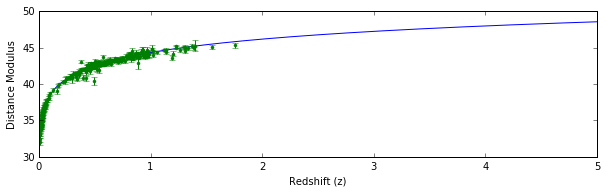

In [34]:
###################             Problem 3                ##############################
#
#  Part c) 
#
#  i) Plot the best fit model.
#
#




import scipy

from scipy.optimize import fmin

import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint

from astropy import constants as constants

from astropy import units as units

%matplotlib inline

h=0.63

h1=1.0

c=3.0E8/1000.0

H0=100.0*h1

Omega_m=.31

Omega_y=1-Omega_m

D_H=c/H0




def E(z1):
    
    
    
    Ez=np.sqrt(((Omega_m)*((1+z1)**3))+Omega_y)

    return Ez

    
def Dc(z1):
    
    
    
    dDc_dz= D_H*1/(E(z1))
    
    return dDc_dz


def main(y, z1): 
     
       
    derivs=[Dc(z1)]


    return derivs
                       
                                   
                                   
y0=[0]
                                   
                                   
                                   
#redshift array for solution

z1 = np.linspace(0, 5, 1000)
                                   
#solution                                   
soln = odeint(main, y0, z1)

Dl=soln[:,0]*(1+z1)

mu1= 25 - (5*np.log10(h)) + 5*np.log10(Dl)

fig = plt.figure(1, figsize=(10,12))


ax2 = fig.add_subplot(412)
ax2.plot(z1, mu1)
ax2.set_xlabel('Redshift (z)')
ax2.set_ylabel('Distance Modulus')




mu=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(2))

z=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(1))



sigma=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(3))

plt.errorbar(z, mu, yerr=sigma, fmt='.', ecolor='g')

plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus')



In [35]:
###################             Problem 3                ##############################
#
#  Part c) Continued
#
# ii) What is the best fit model?
#     
#      The best fit model has values of omega and h that minimize chi^2.
#     
# iii) How good is your fit? (what values do you expect for chi^2)
#
#      I expect values that are near 1 for (chi^2)/(number of data - number of free parameters). 

In [ ]:
###################             Problem 4                ##############################
#
#  Part a) Answer: Maximum likelyhood.
#
#


Optimization terminated successfully.
         Current function value: 393.490323
         Iterations: 33
         Function evaluations: 61


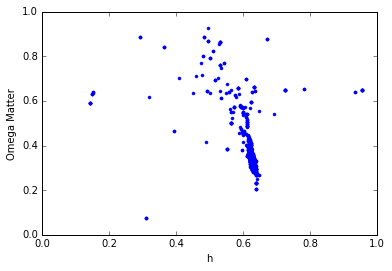

In [27]:
###################             Problem 4                ##############################
#
#  Part b) Using MCMC Omega is 0.31+0.15, 0.31-0.15 and h is 0.63+0.1, 0.63-0.1.
#
#          The points do not include Omega=1.
#
#





import numpy as np

import emcee

import scipy

from scipy.optimize import fmin

import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint

from astropy import constants as constants

from astropy import units as units

from scipy.integrate import quad

%matplotlib inline


c=3.0E8/1000.0

def Ezfunc(z1, omega_m):
    h1=1
    
    H0=100.0*h1

    D_H=c/H0  

    omega_y=1-omega_m

    Ez=np.sqrt(((omega_m)*((1+z1)**(3.0)))+omega_y)
    
    return Ez

def main( z1, omega_m):
    
    
    dDc_dz= D_H/(Ezfunc(z1, omega_m))
    
    return dDc_dz



def mu_th(z1, omega_m, h):

  
    soln = quad(main, 0.0, z1, args=(omega_m))
    
    Dl= (soln[0]*(1.0+z1))
    
    u= 25 - (5*np.log10(h)) + (5*np.log10(Dl))

    return u



z_array=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(1))

mu_array=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(2))

sigma_array=np.genfromtxt('SN.dat.txt', skip_header=1, usecols=(3))



def chi_2(parameters, z_array, sigma_array, mu_array):
    
    omega_m, h= parameters
    
    chi2 = 0
    
    mumodel = 0
    
    for i in range(len(z_array)):
        
        mumodel=mu_th(z_array[i], omega_m, h)
        
        chi2+=(((mu_array[i]) - (mumodel))**2)/((sigma_array[i])**2)
    
    
    return chi2

para = ([.23,.7])


fmin(chi_2, para, args=(z_array, sigma_array, mu_array))






def likelyhood(parameters, z_array, sigma_array, mu_array):
    omega_m, h = parameters
   

    if omega_m < 0 or omega_m > 1:
        
        return -1E20
   
    if h < 0 or h > 1:
        
        return -1E20

        
    return -0.5*chi_2(parameters, z_array, sigma_array, mu_array)



#pos, prob, state = sampler.run_mcmc(p0, 100)
#sampler.reset()

ndim, nwalkers = 2, 10
#ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, likelyhood, args=(z_array, sigma_array, mu_array))
sampler.run_mcmc(p0, 100)

plt.plot(sampler.flatchain[:,1], sampler.flatchain[:,0], '.')
plt.xlim(0, 1)
plt.ylim(0,1)
plt.xlabel('h')
plt.ylabel('Omega Matter')

In [28]:
###################             Problem 4                ##############################
#
#  Part c) I also get an error value with MCMC. The errors for Omega are + 0.15 ,-0.15  and the errors for h are + 0.1 ,- 0.1 
#
#


In [2]:
###################             Problem 4                ##############################
#
#  Part d) Omega_mass= 0.31+0.15, 0.31-0.15; h= 0.63+0.1, 0.63-0.1;  Omega_lamda= 1 - (omega_mass)= 0.69+ 0.15 , 0.69-0.15
#
#
